In [217]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob


In [213]:
image_list = []
for filename in glob.iglob("mashtots-dataset" + '**/**', recursive=True):
     if filename.endswith('.png'):
         image_list.append(np.array(Image.open(filename).getdata()))
image_list = np.array(image_list)
print("image_list shape = ",image_list.shape)
image_mean = np.mean(image_list, axis = 0)

image_list = (image_list - image_mean)
print("image_list shape ",image_list.shape)
features = image_list
print("features shape ",features.shape)
cov_matrix = np.cov(features,rowvar=0)

print("cov_matrix shape ",cov_matrix.shape)
    
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("eigen_vectors shape ",eigen_vectors.shape)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print(sorted_eigenvectors.shape)
# #Step-5
eigenvector_subset = sorted_eigenvectors[:,0:2]
print(eigenvector_subset.shape)
print(features.shape)
# #Step-6
X_reduced = np.dot(eigenvector_subset.transpose() , features.transpose() ).transpose()

print("X_reduced.shape",X_reduced.shape)

image_list shape =  (60, 4096)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
image_list shape  (60, 4096)
features shape  (60, 4096)
cov_matrix shape  (4096, 4096)
eigen_vectors shape  (4096, 4096)
(4096, 4096)
(4096, 2)
(60, 4096)
X_reduced.shape (60, 2)


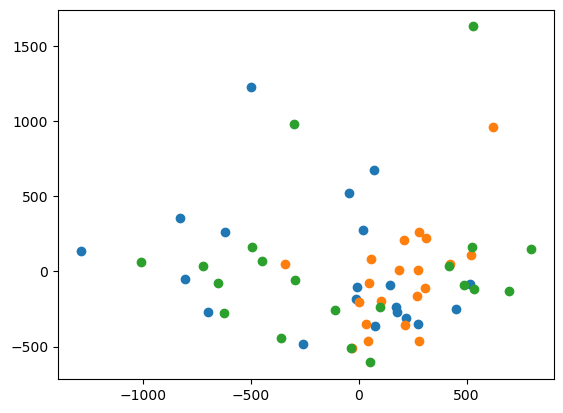

In [249]:
newarr = np.array_split(X_reduced, 3)

plt.scatter(newarr[0][:,0],newarr[0][:,1]) # Ա
plt.scatter(newarr[1][:,0],newarr[1][:,1]) # Բ
plt.scatter(newarr[2][:,0],newarr[2][:,1]) # Գ